In [3]:
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10_5
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('data/car_prices.csv')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [5]:
#!pip install bokeh

# Preprocessing

In [6]:
import re

def has_no_capital_letters(text):
    return not bool(re.search(r'[A-Z]', text))

bad_make_labels=[make for make in df['make'].dropna().unique() if has_no_capital_letters(make)]
make_labels_dict={bad_make_label:bad_make_label.title() for bad_make_label in bad_make_labels}
make_labels_dict

{'lincoln': 'Lincoln',
 'bmw': 'Bmw',
 'ford': 'Ford',
 'mitsubishi': 'Mitsubishi',
 'smart': 'Smart',
 'chevrolet': 'Chevrolet',
 'chrysler': 'Chrysler',
 'pontiac': 'Pontiac',
 'landrover': 'Landrover',
 'cadillac': 'Cadillac',
 'land rover': 'Land Rover',
 'mercedes': 'Mercedes',
 'mazda': 'Mazda',
 'toyota': 'Toyota',
 'lexus': 'Lexus',
 'gmc truck': 'Gmc Truck',
 'honda': 'Honda',
 'nissan': 'Nissan',
 'porsche': 'Porsche',
 'dodge': 'Dodge',
 'subaru': 'Subaru',
 'oldsmobile': 'Oldsmobile',
 'hyundai': 'Hyundai',
 'jeep': 'Jeep',
 'dodge tk': 'Dodge Tk',
 'acura': 'Acura',
 'volkswagen': 'Volkswagen',
 'suzuki': 'Suzuki',
 'kia': 'Kia',
 'audi': 'Audi',
 'gmc': 'Gmc',
 'maserati': 'Maserati',
 'mazda tk': 'Mazda Tk',
 'mercury': 'Mercury',
 'buick': 'Buick',
 'hyundai tk': 'Hyundai Tk',
 'mercedes-b': 'Mercedes-B',
 'vw': 'Vw',
 'chev truck': 'Chev Truck',
 'ford tk': 'Ford Tk',
 'plymouth': 'Plymouth',
 'ford truck': 'Ford Truck',
 'airstream': 'Airstream',
 'dot': 'Dot'}

In [7]:
df['make']=df['make'].apply(lambda x:make_labels_dict[x] if x in make_labels_dict else x)

In [8]:
sorted(df['make'].dropna().unique().tolist())

['Acura',
 'Airstream',
 'Aston Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Bmw',
 'Buick',
 'Cadillac',
 'Chev Truck',
 'Chevrolet',
 'Chrysler',
 'Daewoo',
 'Dodge',
 'Dodge Tk',
 'Dot',
 'FIAT',
 'Ferrari',
 'Fisker',
 'Ford',
 'Ford Tk',
 'Ford Truck',
 'GMC',
 'Geo',
 'Gmc',
 'Gmc Truck',
 'HUMMER',
 'Honda',
 'Hyundai',
 'Hyundai Tk',
 'Infiniti',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Lamborghini',
 'Land Rover',
 'Landrover',
 'Lexus',
 'Lincoln',
 'Lotus',
 'MINI',
 'Maserati',
 'Mazda',
 'Mazda Tk',
 'Mercedes',
 'Mercedes-B',
 'Mercedes-Benz',
 'Mercury',
 'Mitsubishi',
 'Nissan',
 'Oldsmobile',
 'Plymouth',
 'Pontiac',
 'Porsche',
 'Ram',
 'Rolls-Royce',
 'Saab',
 'Saturn',
 'Scion',
 'Smart',
 'Subaru',
 'Suzuki',
 'Tesla',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'Vw']

In [9]:
make_labels_dict_2={
    'Bmw':'BMW',
    'Ford Tk':'Ford Truck',
    'Gmc':'GMC',
    'Gmc Truck':'GMC Truck',
    'Landrover':'Land Rover',
    'Mercedes-B':'Mercedes-Benz',
    'Mercedes':'Mercedes-Benz',
    'Vw':'Volkswagen',
}

df['make']=df['make'].apply(lambda x:make_labels_dict_2[x] if x in make_labels_dict_2 else x)

In [10]:
df['make']=df['make'].str.replace(' Tk', ' Truck',regex=True)

# Visualization

### Question: The changes in the top 5 car manufacturers with the highest production quantities in 2015 and how their production quantities have changed each year thereafter?

In [11]:
df_2015 = df[df['year'] == 2015]

manufacturer_production_2015 = df_2015['make'].value_counts()

# Get the top 5 manufacturers in 2015
top_5_manufacturers_2015 = manufacturer_production_2015.head(5)
top_5_manufacturers_2015

make
Kia          1482
Chevrolet    1438
Ford          990
BMW           658
Nissan        623
Name: count, dtype: int64

In [12]:
top_5_manufacturers = ['Kia', 'Chevrolet', 'Ford', 'BMW', 'Nissan']
df_top_5 = df[df['make'].isin(list(top_5_manufacturers))]
df_top_5

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [13]:
df_grouped = df_top_5.groupby(['make', 'year']).size().reset_index(name='production_quantity')
df_grouped

,make,year,production_quantity
0,BMW,1991,1
1,BMW,1992,1
2,BMW,1994,12
3,BMW,1995,22
4,BMW,1996,19
...,...,...,...
118,Nissan,2011,5917
119,Nissan,2012,16879
120,Nissan,2013,11727
121,Nissan,2014,5652


#### Using seaborn

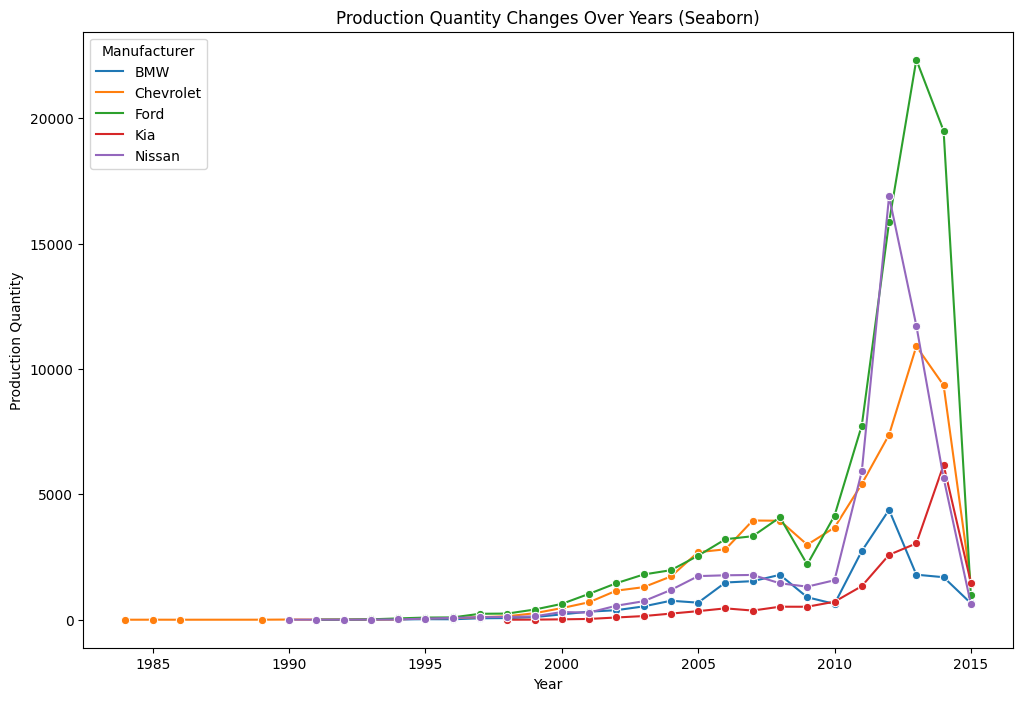

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_grouped, x='year', y='production_quantity', hue='make', marker='o')
plt.title('Production Quantity Changes Over Years (Seaborn)')
plt.xlabel('Year')
plt.ylabel('Production Quantity')
plt.legend(title='Manufacturer')
plt.show()

#### Using plotly

In [15]:
fig = px.line(df_grouped, x='year', y='production_quantity', color='make', markers=True,
              title='Production Quantity Changes Over Years (Plotly)',
              labels={'year': 'Year', 'production_quantity': 'Production Quantity', 'make': 'Manufacturer'},
              width=1000, height=600)  # Adjust width and height as needed

# Add animation
fig.update_layout(updatemenus=[dict(type='buttons',
                                    showactive=False,
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)]),
                                             dict(label='Pause',
                                                  method='animate',
                                                  args=[[None], dict(frame=dict(duration=0, redraw=False), mode='immediate', transition=dict(duration=0))])])])

frames = [dict(data=[dict(x=df_grouped[df_grouped['make'] == make]['year'],
                          y=df_grouped[df_grouped['make'] == make]['production_quantity'],
                          mode='lines',
                          name=make) for make in df_grouped['make'].unique()])]
fig.frames = frames

fig.show()

#### Using bokeh

In [16]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10_5

# Enable Bokeh to display plots inline in the Jupyter Notebook
output_notebook()

# Convert DataFrame to ColumnDataSource
source = ColumnDataSource(df_grouped)

# Plot using Bokeh
p = figure(title='Production Quantity Changes Over Years (Bokeh)', 
           x_axis_label='Year', 
           y_axis_label='Production Quantity',
           width=1000,  # Chỉnh kích thước chiều rộng
           height=600)  # Chỉnh kích thước chiều cao
colors = Category10_5  # Color palette for different manufacturers
for i, manufacturer in enumerate(top_5_manufacturers):
    df_manufacturer = df_grouped[df_grouped['make'] == manufacturer]
    p.line(x='year', y='production_quantity', source=df_manufacturer, legend_label=manufacturer, color=colors[i], line_width=2)
    p.circle(x='year', y='production_quantity', source=df_manufacturer, color=colors[i], size=8, alpha=0.8)
p.legend.location = "top_left"
show(p)


Loading BokehJS ...